# Chapter 13: Statistics

Robert Johansson

Source code listings for [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9).

The source code listings can be downloaded from http://www.apress.com/9781484205549

*Population* refers to the entire group you are interested in studying. It includes every single individual or item that fits a certain description. For example, if you're studying all high school students in Australia, the population is all high school students in Australia.

*Sample* refers to a subset of the population. It's a smaller group selected from the population, which you actually collect data from, often because studying the whole population is too costly or impractical. The idea is that the sample should represent the population well enough to draw conclusions about it.

## Imports

In [1]:
from scipy import stats

In [2]:
from scipy import optimize

In [3]:
import numpy as np
import random

In [4]:
#%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
sns.set(style="whitegrid")

## Descriptive statistics

In [8]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
print(x)

[3.5 1.1 3.2 2.8 6.7 4.4 0.9 2.2]


$\overline{x} = \frac{\sum_{i=1}^{n}x_i}{n} = \frac{x_1 + x_2 + ... + x_n}{n} $

In [59]:
len(x)

8

In [62]:
np.sort(x)

array([0.9, 1.1, 2.2, 2.8, 3.2, 3.5, 4.4, 6.7])

In [9]:
np.mean(x)

3.1

If n is even $ \tilde{x} = \frac{(\frac{n}{2})^\text{th} \text{ obs.} + (\frac{n+1}{2})^\text{th} \text{ obs.}}{2} $

If n is odd $ \tilde{x} = \frac{n+1}{2}^\text{th}\text{ obs.}$

In [10]:
np.median(x)

3.0

In [11]:
x.min(), x.max()

(0.9, 6.7)

$s^2 = \frac{\sum_{i=1}^{n}(x_i - \overline{x})^2}{n-1} = \frac{\sum_{i=1}^{n}x_i^2 - n\overline{x}^2}{n-1}$

In [12]:
x.var()

3.0700000000000007

$s = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \overline{x})^2}{n-1}} = \sqrt{\frac{\sum_{i=1}^{n}x_i^2 - n\overline{x}^2}{n-1}}$

In [13]:
x.std()

1.7521415467935233

ddof - delta degrees of freedom

In [14]:
x.var(ddof=1)

3.5085714285714293

In [15]:
x.std(ddof=1)

1.8731181032095732

## Random numbers

In [16]:
random.seed(123456789)

In [17]:
random.random()

0.6414006161858726

In [18]:
random.randint(0, 10)  # 0 and 10 inclusive

8

In [19]:
np.random.seed(123456789)

In [20]:
np.random.rand()

0.532833024789759

In [21]:
np.random.randn()

0.8768342101492541

In [22]:
np.random.rand(5)

array([0.71356403, 0.25699895, 0.75269361, 0.88387918, 0.15489908])

In [23]:
np.random.randn(2, 4)

array([[ 3.13325952,  1.15727052,  1.37591514,  0.94302846],
       [ 0.8478706 ,  0.52969142, -0.56940469,  0.83180456]])

In [24]:
np.random.randint(10, size=10)

array([0, 3, 8, 3, 9, 0, 6, 9, 2, 7])

In [25]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[12, 18, 18, 17, 14, 12, 14, 10, 16, 19],
       [15, 13, 15, 18, 11, 17, 17, 10, 13, 17]])

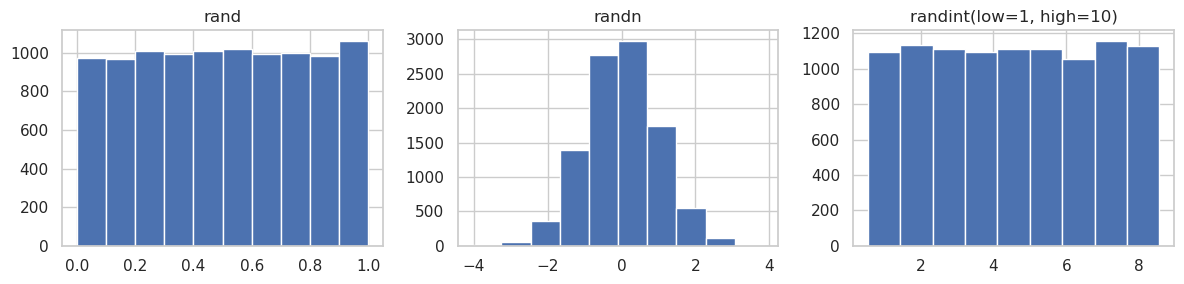

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

fig.tight_layout()
fig.savefig("ch13-random-hist.pdf")

In [27]:
#random.sample(range(10), 5)

In [28]:
np.random.choice(10, 5, replace=False)

array([9, 0, 5, 8, 1])

In [29]:
np.random.seed(123456789)

In [30]:
np.random.rand()

0.532833024789759

In [31]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [32]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [33]:
prng = np.random.RandomState(123456789)

In [34]:
prng.rand(2, 4)

array([[0.53283302, 0.5341366 , 0.50955304, 0.71356403],
       [0.25699895, 0.75269361, 0.88387918, 0.15489908]])

In [35]:
prng.chisquare(1, size=(2, 2))

array([[1.00418922e+00, 1.26859720e+00],
       [2.02731988e+00, 2.52605129e-05]])

In [36]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [37]:
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [38]:
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [39]:
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

# Probability distributions and random variables

In [40]:
np.random.seed(123456789)

In [41]:
X = stats.norm(1, 0.5)

In [42]:
X.mean()

1.0

In [43]:
X.median()

1.0

In [44]:
X.std()

0.5

In [45]:
X.var()

0.25

In [46]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [47]:
X.stats()

(1.0, 0.25)

In [48]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [49]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

In [50]:
X.rvs(10)

array([2.106451  , 2.0641989 , 1.9208557 , 1.04119124, 1.42948184,
       0.58699179, 1.57863526, 1.68795757, 1.47151423, 1.4239353 ])

In [51]:
stats.norm(1, 0.5).stats()

(1.0, 0.25)

In [52]:
stats.norm.stats(loc=2, scale=0.5)

(2.0, 0.25)

In [53]:
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [54]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

In [55]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()
    
    return axes

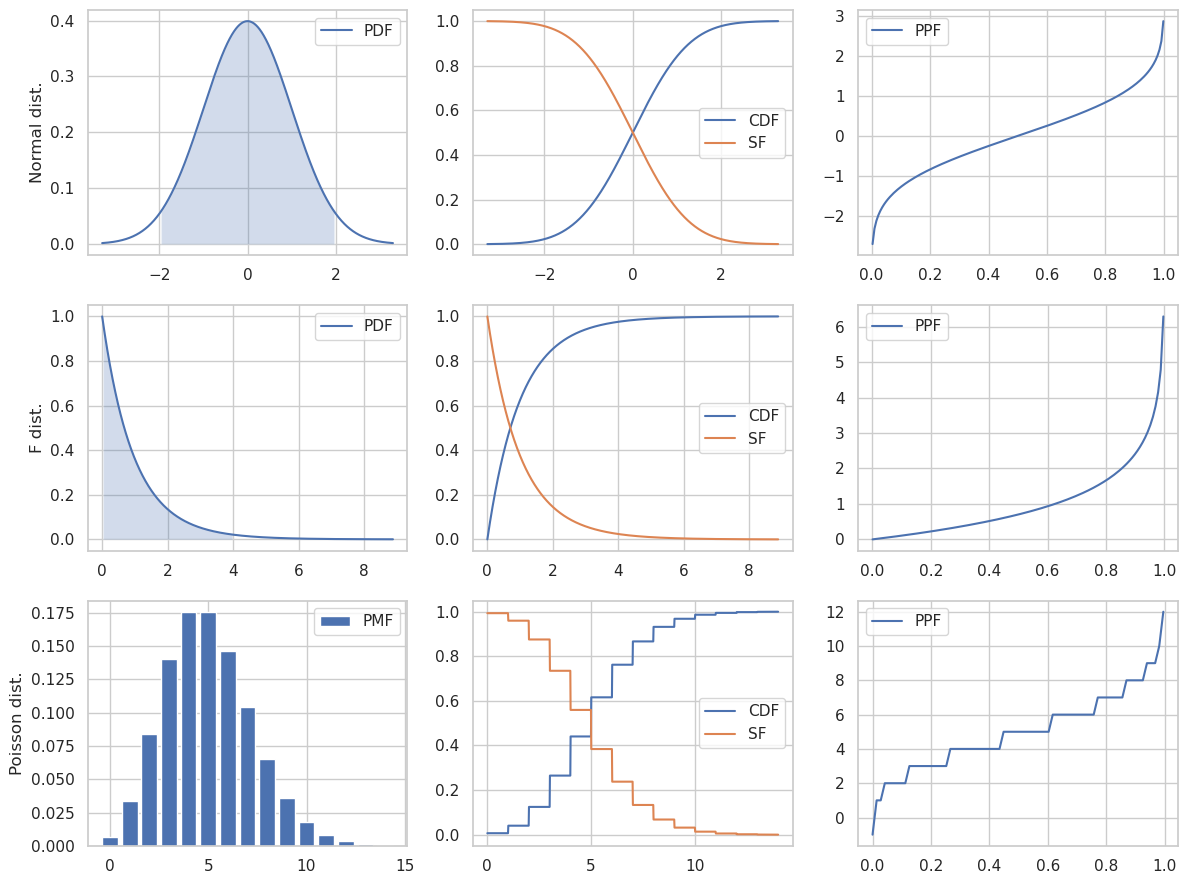

In [56]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

fig.tight_layout()
fig.savefig("ch13-distributions.pdf")

In [57]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", normed=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

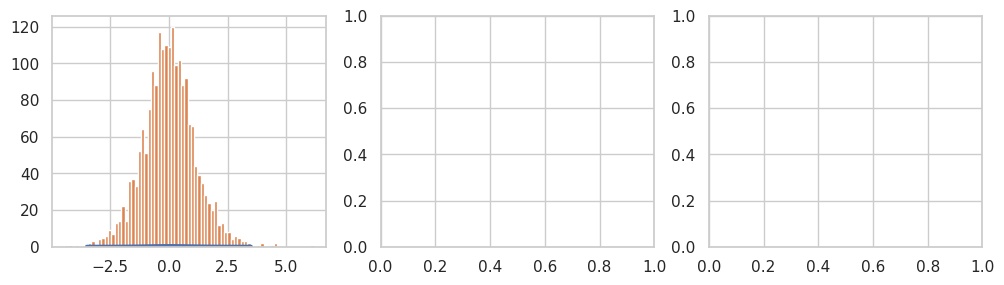

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(2000), "Student's t dist.", ax=axes[0])
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(2000), r"$\chi^2$ dist.", ax=axes[1])
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(2000), "exponential dist.", ax=axes[2])
fig.tight_layout()
fig.savefig("ch13-dist-sample.pdf")

In [ ]:
X = stats.chi2(df=5)

In [ ]:
X_samples = X.rvs(500)

In [ ]:
df, loc, scale = stats.chi2.fit(X_samples)

In [ ]:
df, loc, scale

(4.728645123391404, 0.032573302191333871, 1.0734482977974253)

In [ ]:
Y = stats.chi2(df=df, loc=loc, scale=scale)

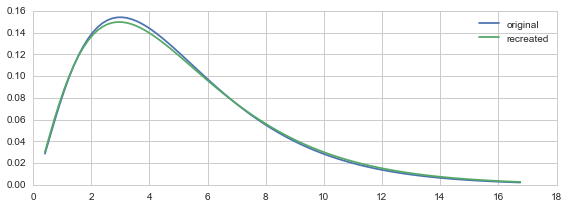

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

ax.plot(x, X.pdf(x), label="original")
ax.plot(x, Y.pdf(x), label="recreated")
ax.legend()

fig.tight_layout()
fig.savefig("ch13-max-likelihood-fit.pdf")

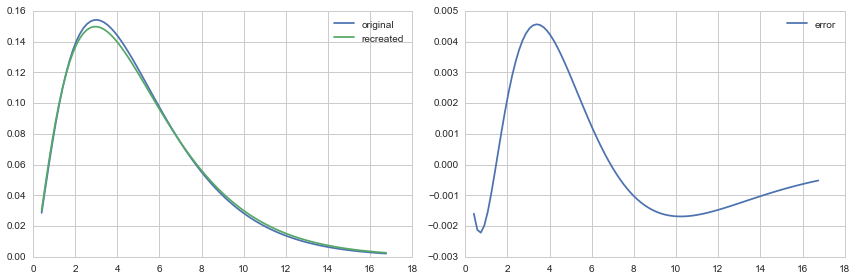

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

fig.tight_layout()
fig.savefig("ch13-max-likelihood-fit.pdf")

# Hypothesis testing

In [ ]:
np.random.seed(123456789)

In [ ]:
mu, sigma = 1.0, 0.5

In [ ]:
X = stats.norm(mu-0.2, sigma)

In [ ]:
n = 100

In [ ]:
X_samples = X.rvs(n)

In [ ]:
z = (X_samples.mean() - mu)/(sigma/np.sqrt(n))

In [ ]:
z

-2.8338979550098298

In [ ]:
t = (X_samples.mean() - mu)/(X_samples.std(ddof=1)/np.sqrt(n))

In [ ]:
t

-2.9680338545657845

In [ ]:
stats.norm().ppf(0.025)

-1.9599639845400545

In [ ]:
2 * stats.norm().cdf(-abs(z))

0.0045984013290753566

In [ ]:
2 * stats.t(df=(n-1)).cdf(-abs(t))

0.0037586479674227209

In [ ]:
t, p = stats.ttest_1samp(X_samples, mu)

In [ ]:
t

-2.9680338545657841

In [ ]:
p

0.0037586479674227209

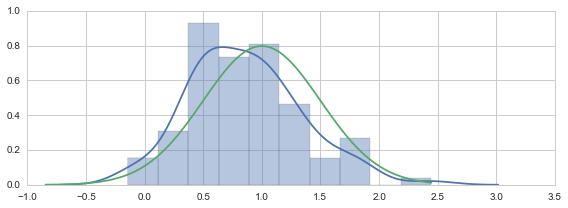

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

fig.tight_layout()
fig.savefig("ch13-hypothesis-test-dist-sample-mean.pdf")

In [ ]:
n = 50

In [ ]:
mu1, mu2 = np.random.rand(2)

In [ ]:
X1 = stats.norm(mu1, sigma)

In [ ]:
X1_sample = X1.rvs(n)

In [ ]:
X2 = stats.norm(mu2, sigma)

In [ ]:
X2_sample = X2.rvs(n)

In [ ]:
t, p = stats.ttest_ind(X1_sample, X2_sample)

In [ ]:
t

-1.4283175246005888

In [ ]:
p

0.15637981059673237

In [ ]:
mu1, mu2

(0.24764580637159606, 0.42145435527527897)

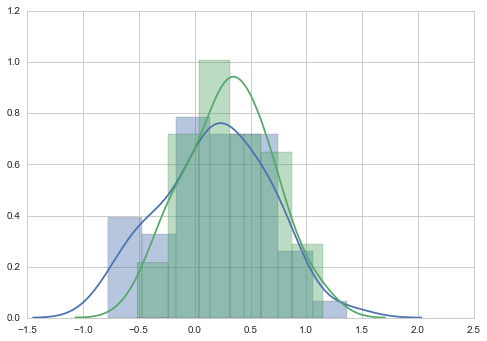

In [ ]:
sns.distplot(X1_sample)
sns.distplot(X2_sample)

# Nonparameteric methods

In [ ]:
np.random.seed(0)

In [ ]:
X = stats.chi2(df=5)

In [ ]:
X_samples = X.rvs(100)

In [ ]:
kde = stats.kde.gaussian_kde(X_samples)

In [ ]:
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

In [ ]:
x = np.linspace(0, 20, 100)

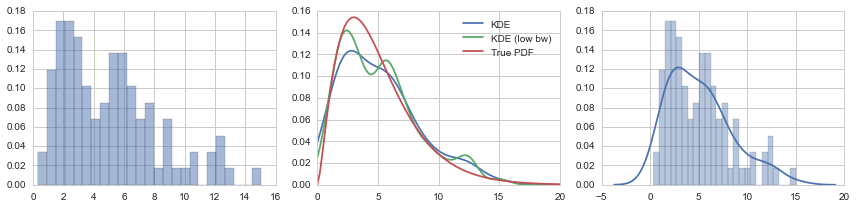

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(X_samples, normed=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

fig.tight_layout()
fig.savefig("ch13-hist-kde.pdf")

In [ ]:
kde.resample(10)

array([[ 1.75376869,  0.5812183 ,  8.19080268,  1.38539326,  7.56980335,
         1.16144715,  3.07747215,  5.69498716,  1.25685068,  9.55169736]])

In [ ]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)

In [ ]:
kde_cdf = np.vectorize(_kde_cdf)

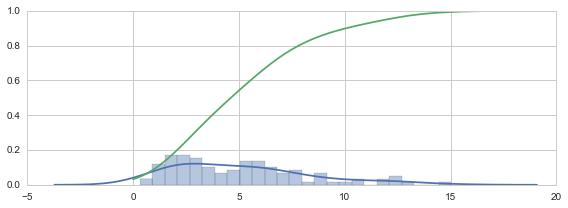

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

sns.distplot(X_samples, bins=25, ax=ax)
x = np.linspace(0, 20, 100)
ax.plot(x, kde_cdf(x))

fig.tight_layout()

In [ ]:
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.dataset.mean(), args=(q,))[0]

In [ ]:
kde_ppf = np.vectorize(_kde_ppf)

In [ ]:
kde_ppf([0.05, 0.95])

array([  0.39074674,  11.94993578])

In [ ]:
X.ppf([0.05, 0.95])

array([  1.14547623,  11.07049769])

# Versions

In [ ]:
%reload_ext version_information

ModuleNotFoundError: No module named 'version_information'

In [ ]:
%version_information numpy, scipy, matplotlib, seaborn

Software,Version
Python,2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython,3.2.1
OS,Darwin 14.1.0 x86_64 i386 64bit
numpy,1.9.2
scipy,0.16.0
matplotlib,1.4.3
seaborn,0.6.0
